## imputing heights and weights

There are missing values in heights and weights variables. We developed simple imputation rule for it. 

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
dd = read_csv("data3.csv")

Parsed with column specification:
cols(
  Height = col_double(),
  Weight = col_double(),
  Age = col_character(),
  Sex = col_character()
)



In [4]:
dd1 = na.omit(dd)

In [5]:
dd1

Height,Weight,Age,Sex
<dbl>,<dbl>,<chr>,<chr>
98,15.90,Child,Female
103,13.10,Child,Female
115,19.10,Child,Male
98,15.90,Child,Male
87,11.20,Child,Male
92,14.00,Child,Female
98,17.66,Child,Female
88,12.50,Child,Female
82,10.70,Child,Female


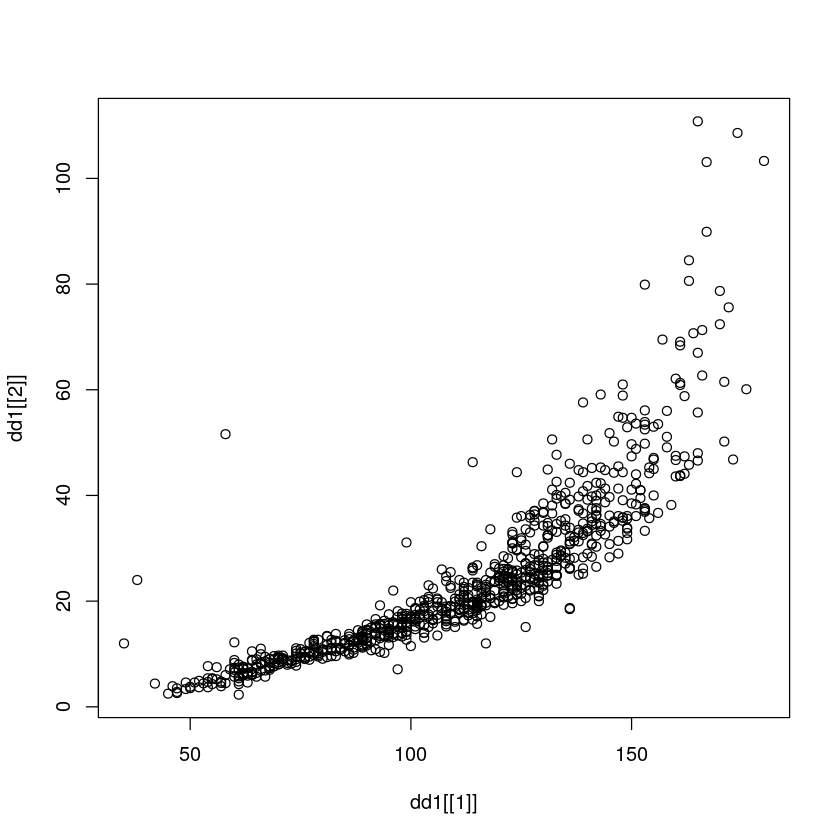

In [6]:
plot(dd1[[1]], dd1[[2]])

In [9]:
dd1$Height2 = dd1$Height^2
dd1$Weight2 = dd1$Weight^2

In [14]:
dd1[0:5,]

Height,Weight,Age,Sex,Height2,Weight2
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
98,15.9,Child,Female,9604,252.81
103,13.1,Child,Female,10609,171.61
115,19.1,Child,Male,13225,364.81
98,15.9,Child,Male,9604,252.81
87,11.2,Child,Male,7569,125.44


In [15]:
lm_h <- lm(Height ~ Weight + Weight2, data = dd1)

In [16]:
lm_w <- lm(Weight ~ Height + Height2, data = dd1)

In [17]:
dd1 %>% group_by(Age) %>% summarize(h = mean(Height), w = mean(Weight))

Age,h,w
<chr>,<dbl>,<dbl>
Adolescent,153.72727,50.081818
Child,114.91264,23.987902
Infant,63.48598,7.358234
Neonate,49.33333,3.423500


In [18]:
dd1 %>% group_by(Sex) %>% summarize(h = mean(Height), w = mean(Weight))

Sex,h,w
<chr>,<dbl>,<dbl>
Female,108.4548,22.15072
Male,113.1019,25.29273


In [19]:
dd1 %>% group_by(Age,Sex) %>% summarize(h = mean(Height), w = mean(Weight))

`summarise()` has grouped output by 'Age'. You can override using the `.groups` argument.



Age,Sex,h,w
<chr>,<chr>,<dbl>,<dbl>
Adolescent,Female,147.25000,45.950000
Adolescent,Male,157.42857,52.442857
Child,Female,113.62264,23.090708
Child,Male,116.18266,24.871207
Infant,Female,63.26415,6.799245
Infant,Male,63.70370,7.906870
Neonate,Female,48.66667,3.327000
Neonate,Male,50.00000,3.520000


In [20]:
dd1  %>% summarize(h = mean(Height), w = mean(Weight))

h,w
<dbl>,<dbl>
110.8463,23.7677
